### Dataset description

Let's explore the data to determine who is most likely to click on the ad!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
%matplotlib inline

In [2]:
data = pd.read_csv('data_lr.csv')

In [3]:
data

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Hour,DayofWeek,Month,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,0,68.95,35,61833.90,256.09,0,0,0,6,3,...,0,0,0,0,0,0,0,0,0,0
1,1,80.23,31,68441.85,193.77,1,0,1,0,4,...,0,0,0,0,0,0,0,0,0,0
2,2,69.47,26,59785.94,236.50,0,0,20,6,3,...,0,0,0,0,0,0,0,0,0,0
3,3,74.15,29,54806.18,245.89,1,0,2,6,1,...,0,0,0,0,0,0,0,0,0,0
4,4,68.37,35,73889.99,225.58,0,0,3,4,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30,71384.57,208.58,1,1,21,3,2,...,0,0,0,0,0,0,0,0,0,0
996,996,51.30,45,67782.17,134.42,1,1,2,4,4,...,0,0,0,0,0,0,0,0,0,0
997,997,51.63,51,42415.72,120.37,1,1,17,0,2,...,0,0,0,0,0,0,0,0,0,0
998,998,55.55,19,41920.79,187.95,0,0,2,3,3,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 247 entries, Unnamed: 0 to Zimbabwe
dtypes: float64(3), int64(244)
memory usage: 1.9 MB


Then the dataset contains 1000 samples and 9 predictores. **Clicked on Ad** attribute is the output that must be predicted.

In [5]:
data.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Hour,DayofWeek,Month,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,0,68.95,35,61833.90,256.09,0,0,0,6,3,...,0,0,0,0,0,0,0,0,0,0
1,1,80.23,31,68441.85,193.77,1,0,1,0,4,...,0,0,0,0,0,0,0,0,0,0
2,2,69.47,26,59785.94,236.50,0,0,20,6,3,...,0,0,0,0,0,0,0,0,0,0
3,3,74.15,29,54806.18,245.89,1,0,2,6,1,...,0,0,0,0,0,0,0,0,0,0
4,4,68.37,35,73889.99,225.58,0,0,3,4,6,...,0,0,0,0,0,0,0,0,0,0


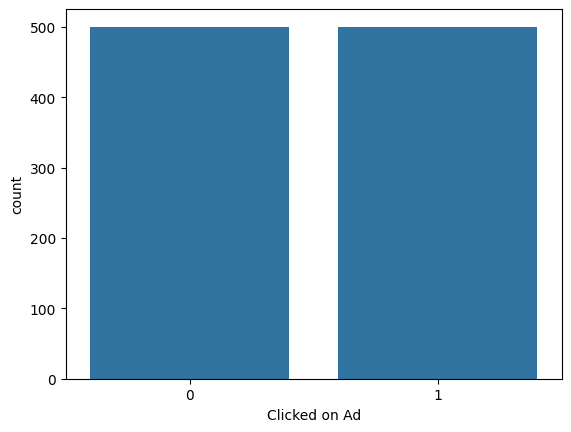

In [6]:
classes = data['Clicked on Ad']
ax = sns.countplot(x=classes, data=data)

From the figure above, the dataset is equilibrated, which will make the study more trusted.

### Dataset visualization

/Users/xena/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/xena/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Clicked on Ad', ylabel='count'>

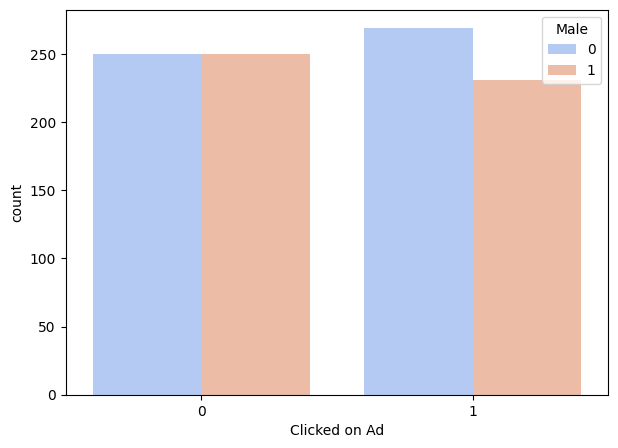

In [7]:
# Click on Ad according to gender
plt.figure(figsize=(7, 5))
sns.countplot(x='Clicked on Ad', data=data, hue='Male', palette='coolwarm')

Women tend to click more on ads!

In [8]:
data[data['Clicked on Ad']==1]['Month'].value_counts().head(5)

Month
2    83
5    79
3    74
4    74
6    71
Name: count, dtype: int64

Valentine's Day (February 14) is the best-selling day for the company's announcement.

/var/folders/sl/q4v92dy13b15fkbcnvclbs2w0000gp/T/ipykernel_12803/2570699496.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=data['Clicked on Ad'],y= data['Age'],data=data,palette='coolwarm')
/Users/xena/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'Age wise distribution of Ad clicks')

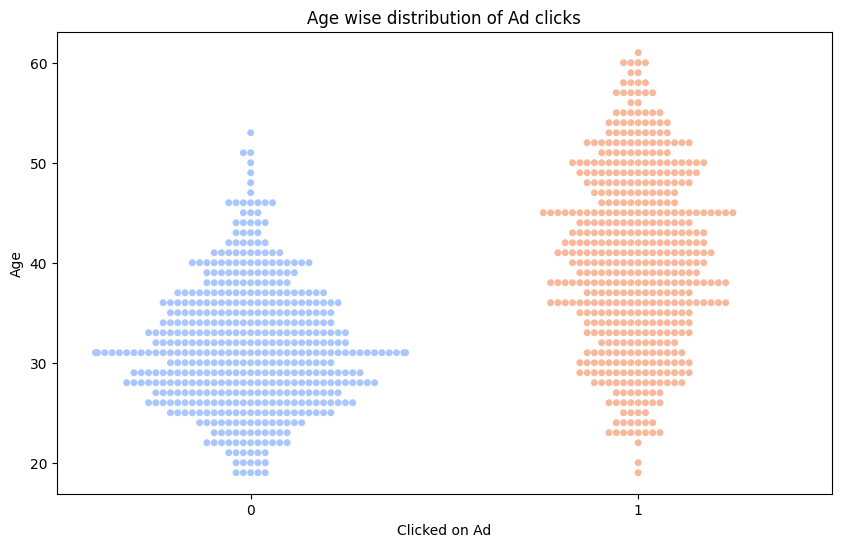

In [9]:
# Age wise distribution of Ad clicks
plt.figure(figsize=(10,6))
sns.swarmplot(x=data['Clicked on Ad'],y= data['Age'],data=data,palette='coolwarm')
plt.title('Age wise distribution of Ad clicks')

The population of around 40 is the largest contributor to ad clicks.



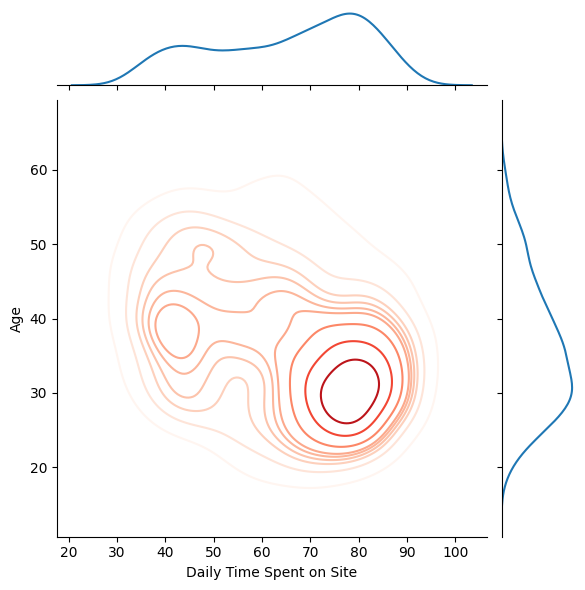

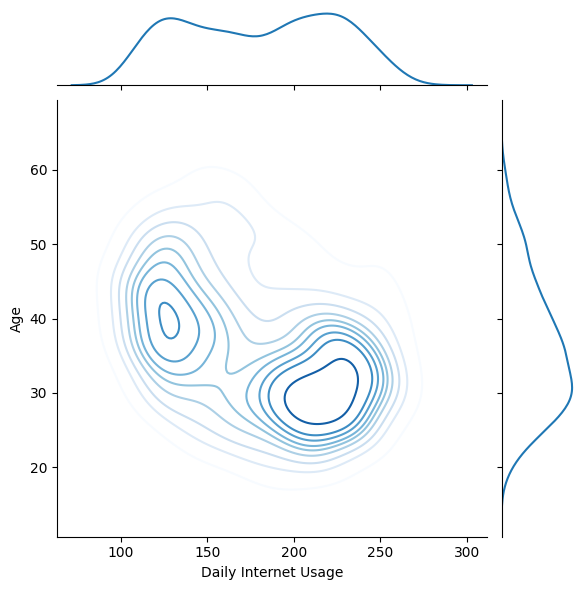

In [37]:
#Let's see Daily internet usage and daily time spent on site based on age
# fig, axes = plt.subplots(figsize=(10, 6))
ax = sns.jointplot(
    x = data['Daily Time Spent on Site'], y= data['Age'], cmap="Reds", kind="kde"
    )
ax = sns.jointplot(
    x=data['Daily Internet Usage'],y =data['Age'] ,cmap="Blues", kind="kde"
    )
# ax.set_xlabel('Time')
# ax.text(20, 20, "Daily Time Spent on Site", size=16, color='r')
# ax.text(200, 60, "Daily Internet Usage", size=16, color='b')

As can be seen, people around 30 spend a lot of time on the internet and on the site, but they don't click on the ads that are so frequent (the previous figure). Compared to them, the around 40-year-old population spends a little less time but clicks more on ads.

### Dataset splitting Train/Test

In [12]:
y = data['Clicked on Ad'].values.reshape(-1, 1)
X = data.drop(['Clicked on Ad'], axis=1)
X = X.iloc[:,:9]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )

### Logistic regression

In [13]:
def plot_roc(roc_auc, false_positive_rate, true_positive_rate):
    plt.figure(figsize=(6, 6))
    plt.title('Receiver Operating Characteristics')
    plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = {:.2f}'.format( roc_auc))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rtae')
    plt.xlabel('False Positive Rtae')

In [14]:
# Create a model
log_reg = LogisticRegression()
# Training
log_reg.fit(X_train, y_train.ravel())
# Prediction
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
y_pred_log_reg = np.where(y_prob_log_reg > 0.5, 1, 0)

/Users/xena/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# Confusion matrix
confusion_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
confusion_matrix_log_reg

array([[85,  4],
       [16, 95]])

In [16]:
false_positive_rate_reg, true_positive_rate_reg, thresholds = roc_curve(
    y_test, y_prob_log_reg
    )
roc_auc_log_reg = auc(false_positive_rate_reg, true_positive_rate_reg)
roc_auc_log_reg

0.958396598846037

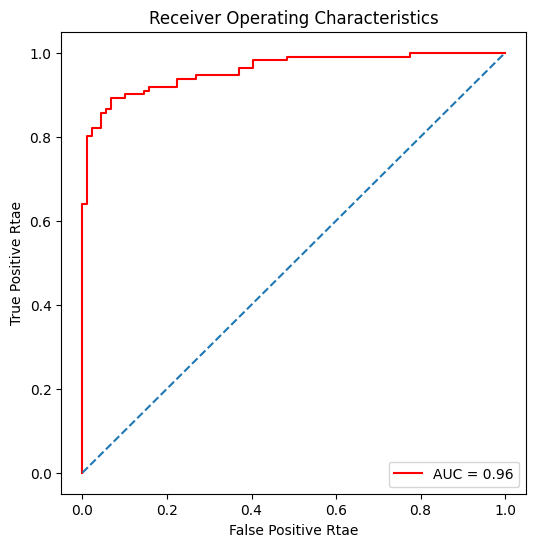

In [17]:
# Draw the ROC curve and get the area under the curve
plot_roc(roc_auc_log_reg, false_positive_rate_reg, true_positive_rate_reg)

### Linear discriminant analysis

In [18]:
# Create a model
lda = LinearDiscriminantAnalysis()
# Training
lda.fit(X_train, y_train.ravel())
# Prediction
y_prob_lda = lda.predict_proba(X_test)[:, 1]
y_pred_lda = np.where(y_prob_lda > 0.5, 1, 0)

In [19]:
# Confusion matrix
confusion_matrix_lda = confusion_matrix(y_test, y_pred_lda)
confusion_matrix_lda

array([[ 87,   2],
       [ 11, 100]])

In [20]:
false_positive_rate_lda, true_positive_rate_lda, thresholds = roc_curve(
    y_test, y_prob_lda
    )
roc_auc_lda = auc(false_positive_rate_lda, true_positive_rate_lda)
roc_auc_lda

0.9770219657860109

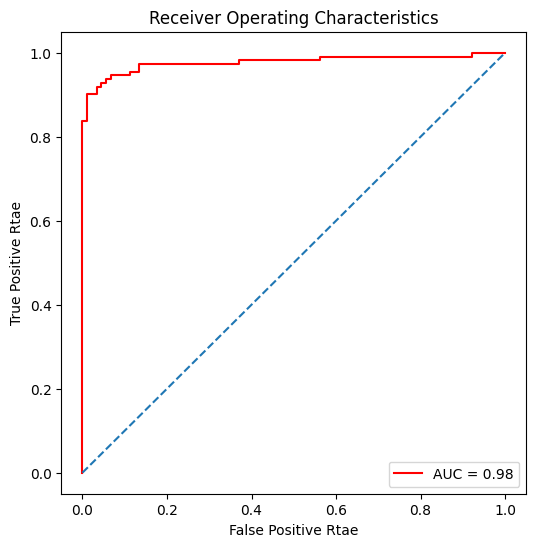

In [21]:
# Draw the ROC curve and get the area under the curve
plot_roc(roc_auc_lda, false_positive_rate_lda, true_positive_rate_lda)

### Quadratic discriminant analysis

In [22]:
# Create a model
qda = QuadraticDiscriminantAnalysis()
# Training
qda.fit(X_train, y_train.ravel())
# Prediction
y_prob_qda = qda.predict_proba(X_test)[:, 1]
y_pred_qda = np.where(y_prob_qda > 0.5, 1, 0)
# Confusion matrix
confusion_matrix_qda = confusion_matrix(y_test, y_pred_qda)
false_positive_rate_qda, true_positive_rate_qda, thresholds = roc_curve(
    y_test, y_prob_qda
    )
roc_auc_qda = auc(false_positive_rate_qda, true_positive_rate_qda)

As noted, there is a large covariance between the variables. In particular after the conversion of the “country” variable into dummy variables, the QDA model gives poor results.

In [23]:
roc_auc_qda

0.9818807571616561

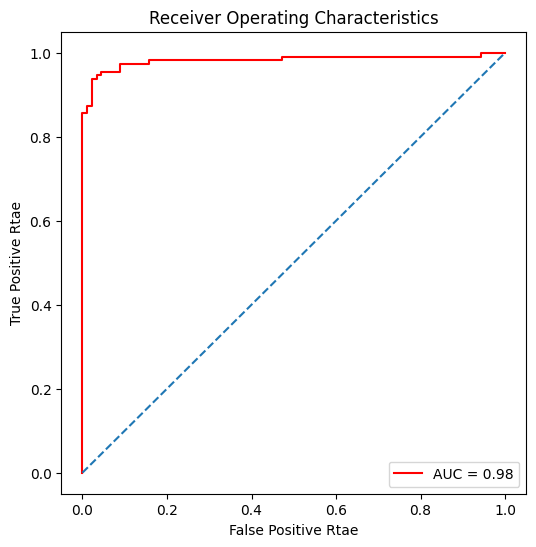

In [24]:
# Draw the ROC curve and get the area under the curve
plot_roc(roc_auc_qda, false_positive_rate_qda, true_positive_rate_qda)

### Conclusion & Comparaison

Text(0.5, 0, 'False Positive Rtae')

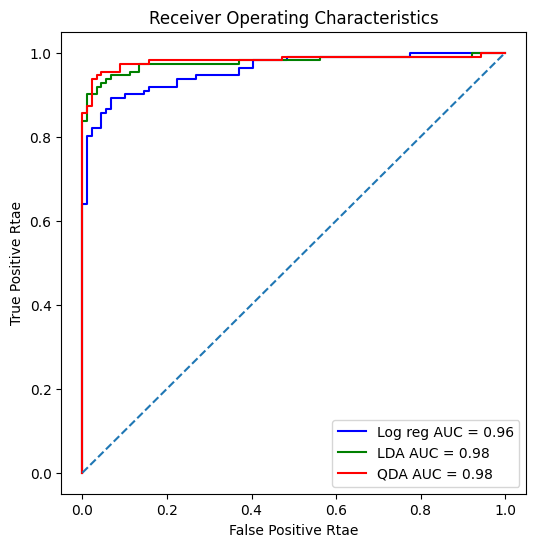

In [25]:
plt.figure(figsize=(6, 6))
plt.title('Receiver Operating Characteristics')
plt.plot(false_positive_rate_reg, true_positive_rate_reg, color='blue', label="Log reg AUC = {:.2f}".format(roc_auc_log_reg))
plt.plot(false_positive_rate_lda, true_positive_rate_lda, color='green', label='LDA AUC = {:.2f}'.format(roc_auc_lda))
plt.plot(false_positive_rate_qda, true_positive_rate_qda, color='red', label='QDA AUC = {:.2f}'.format(roc_auc_qda))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rtae')
plt.xlabel('False Positive Rtae')

Thus, for this problem, the linear discriminant analysis model gives better results than the logistic regression model and the quadratic discriminant analysis model. The quadratic discriminant analysis model to avoid.